In [16]:
import numpy as np
import matplotlib.pyplot as plt

from pandas import read_csv, DataFrame
from pandas import set_option #to display more 
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection  import GridSearchCV 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import PowerTransformer, MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [17]:
data = read_csv("sonar_all_data.csv",header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


ANALYZING DATASET

In [7]:
data.shape

(208, 61)

In [9]:
#We have 208 records and 61 attributes in this dataset

In [11]:
set_option('display.max_rows',250)
print(data.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object


We have 60 columns having numerical values and one column having object datatype. 

In [13]:
#taking look at some of the rows of the dataset
set_option('display.width',100)
print(data.head(10))

       0       1       2       3       4       5       6       7       8       9   ...      51  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  0.2111  ...  0.0027   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337  0.2872  ...  0.0084   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598  0.6194  ...  0.0232   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598  0.1264  ...  0.0121   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564  0.4459  ...  0.0031   
5  0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105  0.3039  ...  0.0045   
6  0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083  0.3513  ...  0.0201   
7  0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465  0.2838  ...  0.0081   
8  0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684  0.1487  ...  0.0145   
9  0.0164  0.0173  0

In [44]:
#descriptions, change precision to 3 places
set_option('precision', 3)
print(data.describe())

            0          1        2        3        4        5        6        7        8        9   \
count  208.000  2.080e+02  208.000  208.000  208.000  208.000  208.000  208.000  208.000  208.000   
mean     0.029  3.844e-02    0.044    0.054    0.075    0.105    0.122    0.135    0.178    0.208   
std      0.023  3.296e-02    0.038    0.047    0.056    0.059    0.062    0.085    0.118    0.134   
min      0.002  6.000e-04    0.002    0.006    0.007    0.010    0.003    0.005    0.007    0.011   
25%      0.013  1.645e-02    0.019    0.024    0.038    0.067    0.081    0.080    0.097    0.111   
50%      0.023  3.080e-02    0.034    0.044    0.062    0.092    0.107    0.112    0.152    0.182   
75%      0.036  4.795e-02    0.058    0.065    0.100    0.134    0.154    0.170    0.233    0.269   
max      0.137  2.339e-01    0.306    0.426    0.401    0.382    0.373    0.459    0.683    0.711   

       ...       50         51         52       53         54         55         56       

In [14]:
#Let's take a quick look at the breakdown of class values.
print(data.groupby(60).size())

60
M    111
R     97
dtype: int64


#Okay we have 111 records having class label as mine and 97 records having class label as rock.

# UNIMODAL DATA VISUALIZATIONS

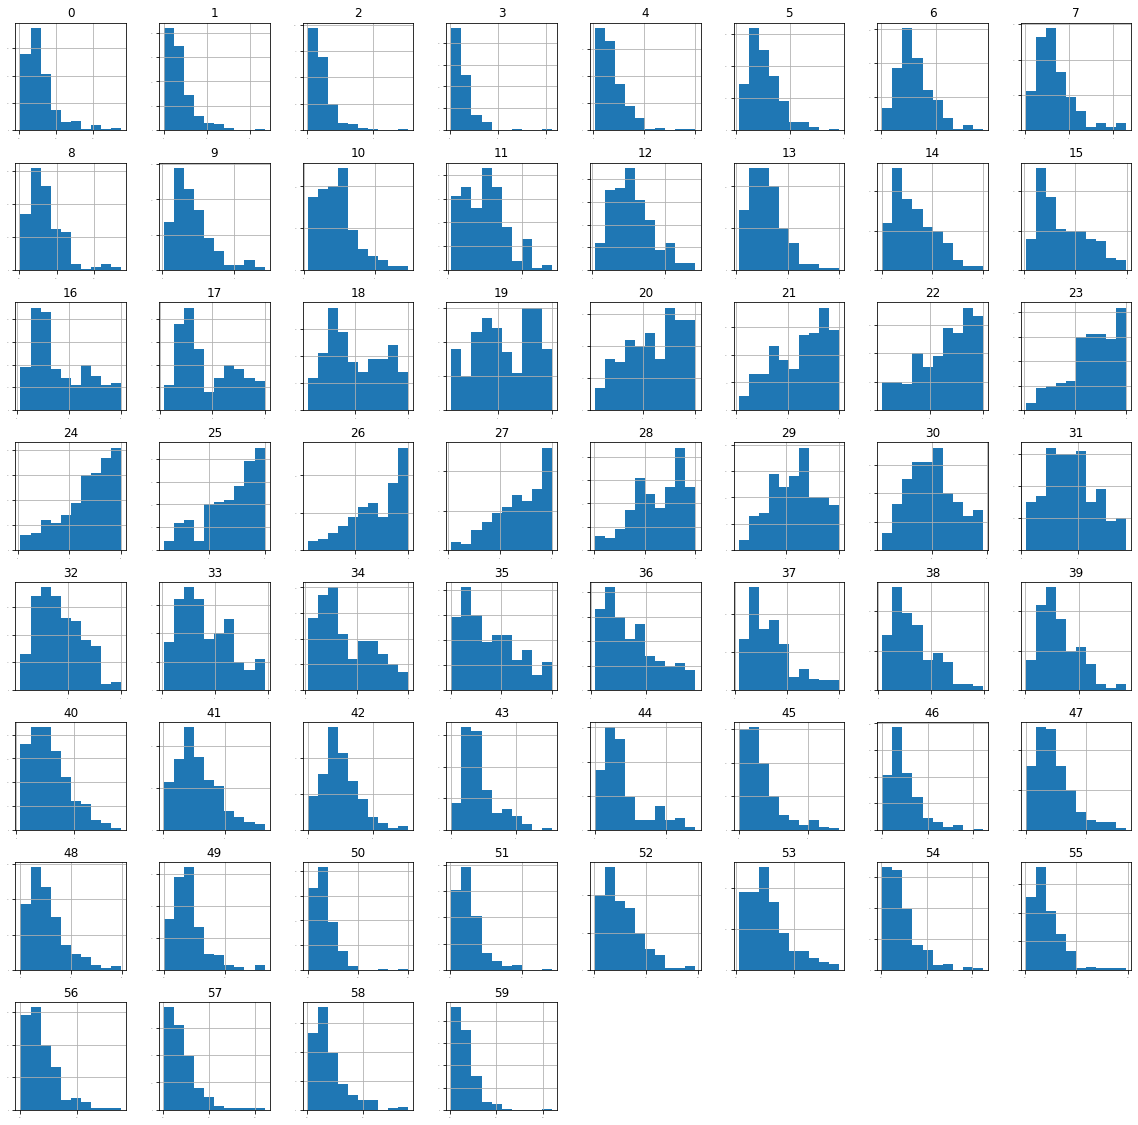

In [22]:
#Plotting histograms of each attribute to get a sense of the data distributions
data.hist(figsize=(20,20),sharex=False, sharey=False,xlabelsize=1, ylabelsize=1)
plt.show()

Here we can see that there are a lot of Gaussian-like dustributions and perhaps some explonential distributions for sime of the attributes.

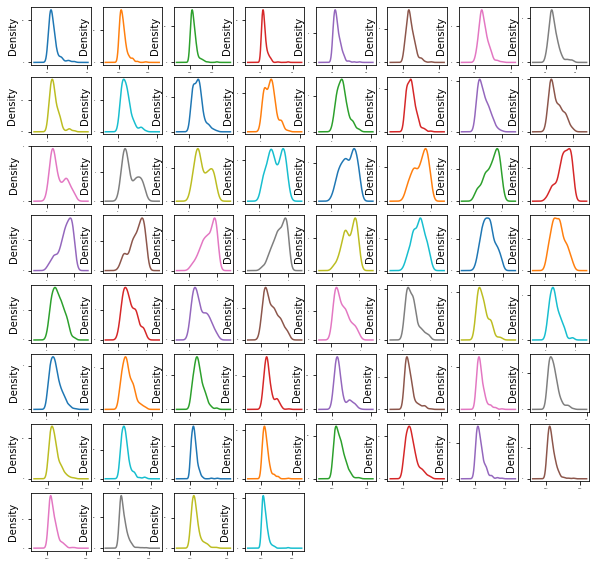

In [30]:
#Looking the same thing using density plot
data.plot(kind='density',figsize=(10,10),subplots=True,layout=(8,8),sharex=False,sharey=False,legend=False,fontsize=2)
plt.show()

We can see that many of the attributes have a skewed distribution.

# DATA VISUALIZATIONS

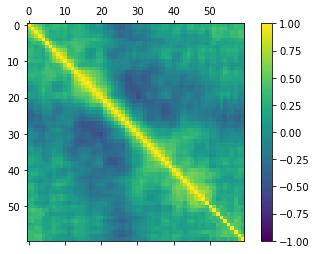

In [63]:
#Let's visualize the correlation between the attributes
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(),vmin=-1,vmax=1,interpolation='none')
fig.colorbar(cax)
plt.show()

The light green around the diagonal suggests that attributes that are next to 
each other are generally more correlated with each other. Some dark green patches also suggest some moderate negative correlation the further attributes are away from each other in the ordering. This makes sense if the order of the attributes refers to the angle of sensors for the sonar chirp.

In [6]:
#Splitting the dataset
array = data.values
X = array[:,0:60].astype(float)
Y = array[:,60]
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20,random_state=seed)

# BASELINE MODEL

In [97]:
num_folds = 10
seed = 7
scoring = 'accuracy'

In [98]:
#Spot-check Algorithms
models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

In [99]:
results=[]
names=[]
for name, model in models:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(model,X_train,Y_train,cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

LR: 0.769485 (0.100510)
LDA: 0.746324 (0.117854)
KNN: 0.808088 (0.067507)
CART: 0.717279 (0.116486)
NB: 0.648897 (0.141868)
SVM: 0.776471 (0.090411)


In [100]:
#Checking the distribution of accuracy values calculated across
#cross validation folds

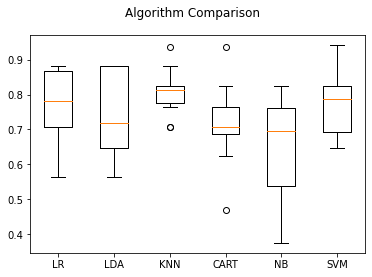

In [101]:
#Comparing algorithms
fig = plt.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The results show a tight distribution for KNN which is encouraging, suggesting low variance.
The poor results for SVM are surprising.

In [102]:
#It is possible that varied distribution of the attributes 
#is having an effect on the accuracy of algorithms such as SVM.
#Now we Standardize the data.

# EVALUATING ALGORITHMS ON STANDARDIZED DATA

In [104]:
#Standardize the data
pipelines=[]
pipelines.append(('ScaledLR',Pipeline([('Scaler',StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledLDA',Pipeline([('Scaler',StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScalerCART',Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB',Pipeline([('Scaler',StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledSVM',Pipeline([('Scaler',StandardScaler()),('SVM',SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(model,X_train,Y_train, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.740441 (0.094668)
ScaledLDA: 0.746324 (0.117854)
ScaledKNN: 0.825735 (0.054511)
ScalerCART: 0.735662 (0.119420)
ScaledNB: 0.648897 (0.141868)
ScaledSVM: 0.836397 (0.088697)


In [105]:
#Now we see that KNN still performs well and now SVM also performs well.

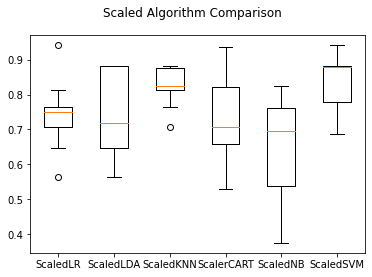

In [106]:
#Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [107]:
#Now we see that tuning KNN and Svm models may result better results.

# TUNING ALGORITHMS

In [111]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits = num_folds, random_state = seed)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring=scoring, cv = kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

Best: 0.850000 using {'n_neighbors': 1}
0.850000 (0.059686) with: {'n_neighbors': 1}
0.837132 (0.066014) with: {'n_neighbors': 3}
0.837500 (0.037377) with: {'n_neighbors': 5}
0.763971 (0.089374) with: {'n_neighbors': 7}
0.751471 (0.087051) with: {'n_neighbors': 9}
0.733456 (0.104831) with: {'n_neighbors': 11}
0.733088 (0.105806) with: {'n_neighbors': 13}
0.727941 (0.076148) with: {'n_neighbors': 15}
0.709926 (0.079287) with: {'n_neighbors': 17}
0.722059 (0.085088) with: {'n_neighbors': 19}
0.710294 (0.109505) with: {'n_neighbors': 21}


We can see that the optimal configuration is K=1. This is interesting as the algorithm will
make predictions using the most similar instance in the training dataset alone.

# Tuning SVM

In [113]:
#Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1,0.3,0.5,0.7,0.9,1.0,1.3,1.5,1.7,2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C= c_values, kernel = kernel_values)
model = SVC()
kfold = KFold(n_splits = num_folds, random_state = seed)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean,stdev, param))

Best: 0.872426 using {'C': 2.0, 'kernel': 'rbf'}
0.758456 (0.099483) with: {'C': 0.1, 'kernel': 'linear'}
0.535294 (0.114222) with: {'C': 0.1, 'kernel': 'poly'}
0.573162 (0.130930) with: {'C': 0.1, 'kernel': 'rbf'}
0.704044 (0.066933) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.746324 (0.109507) with: {'C': 0.3, 'kernel': 'linear'}
0.642647 (0.132187) with: {'C': 0.3, 'kernel': 'poly'}
0.765809 (0.091692) with: {'C': 0.3, 'kernel': 'rbf'}
0.734926 (0.054567) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.740074 (0.082636) with: {'C': 0.5, 'kernel': 'linear'}
0.662132 (0.105668) with: {'C': 0.5, 'kernel': 'poly'}
0.788235 (0.064190) with: {'C': 0.5, 'kernel': 'rbf'}
0.746691 (0.058742) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.746691 (0.084198) with: {'C': 0.7, 'kernel': 'linear'}
0.746324 (0.129754) with: {'C': 0.7, 'kernel': 'poly'}
0.812500 (0.085513) with: {'C': 0.7, 'kernel': 'rbf'}
0.758824 (0.047088) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.758824 (0.096520) with: {'C': 0.9, 'kernel': 'linear'

We can see the most accurate configuration was SVM with an RBF kernel and a C value of 2.0. The accuracy 87.2426% is seemingly better than what KNN could achieve.

# applying ensemble methods to check if the model performance can be made better.

In [120]:
ensembles =[]
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET',ExtraTreesClassifier()))
results=[]
names=[]
for name,model in ensembles:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

AB: 0.813971 (0.066017)
GBM: 0.847794 (0.100189)
RF: 0.825000 (0.108006)
ET: 0.853676 (0.114063)


Here we can see that all 4 ensemble techniques provide strong accuracy scores with default configurations. All the 4 techniques are based on decision trees that less sensitive to data distributions therefore here we have not used data standardization.

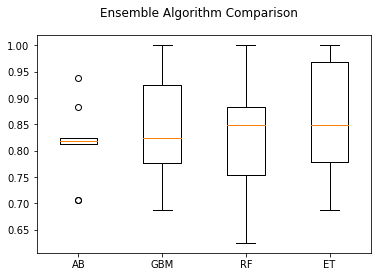

In [122]:
#Comparing Algorithms
fig = plt.figure()
fig.suptitle("Ensemble Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The results suggest that GBM and ET may be worthy of further study, with a strong mean and a spread that skews up towards high 90s(%) in accuracy.

# FINALIZING MODEL

Seeing the performance of all the above models, the SVM showed the better and stable model for this problem. Therefore, we finalize the svm model by training it on the entire training dataset and make predictions for the hold-out validation dataset to confirm our findings.

In [124]:
#Preparing the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=2.0)
model.fit(rescaledX,Y_train)

SVC(C=2.0)

In [127]:
#Estimating accuracy on test set
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test ,predictions))

0.9285714285714286
[[25  2]
 [ 1 14]]
              precision    recall  f1-score   support

           M       0.96      0.93      0.94        27
           R       0.88      0.93      0.90        15

    accuracy                           0.93        42
   macro avg       0.92      0.93      0.92        42
weighted avg       0.93      0.93      0.93        42



Wow!!! We have achieved the accuracy of nearly 93% on the held-out validation dataset.

# changing data distribution

Box-cox Transform cannot be applied here as the data contains 0's. So we will first scale the data to positive values, then apply the transform.

In [21]:
#dataset = data.values[:,:-1]
array = data.values
X = array[:,0:60].astype(float)
Y = array[:,60]
X = X.astype('float32')
Y = LabelEncoder().fit_transform(Y.astype('str'))

scaler = MinMaxScaler(feature_range=(1,2))
transform = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s',scaler),('p',transform)])
X = pipeline.fit_transform(X)

In [24]:
dataset = DataFrame(X)
dataset[60] = Y

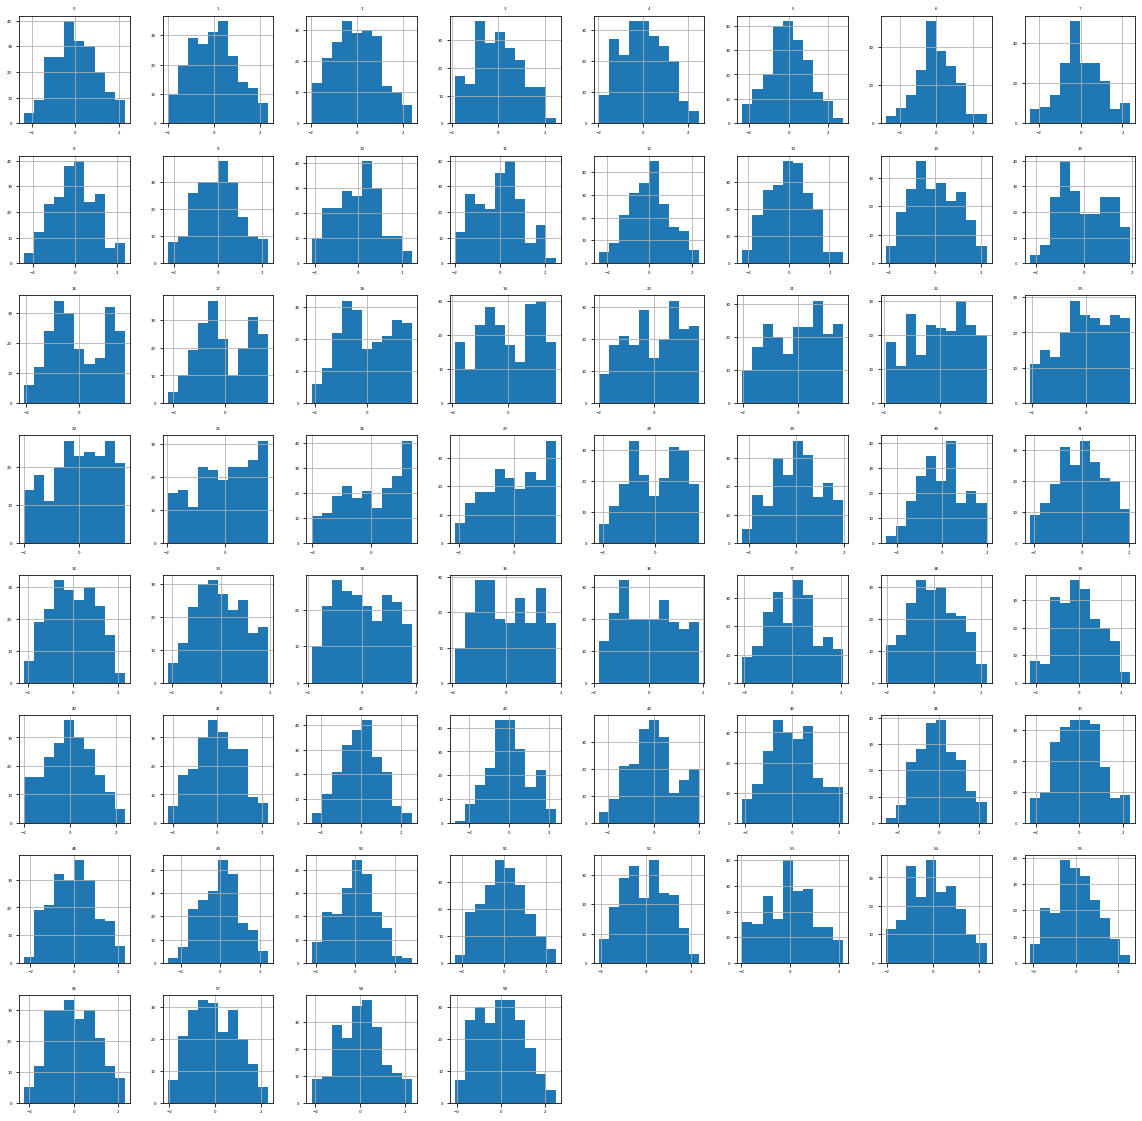

In [15]:
fig = dataset.hist(figsize=(20,20),xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
plt.show()

In [37]:
seed = 7
X=dataset.drop(1,axis=1)
Y= dataset[60]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20,random_state=seed)
model1 = KNeighborsClassifier()
kfold = KFold(n_splits = 10,shuffle=True, random_state = seed)
cv_results = cross_val_score(model1,X_train,Y_train,cv=kfold, scoring='accuracy',n_jobs=-1)

In [38]:
msg = "%s: %f (%f)" % ("KNN", np.mean(cv_results), np.std(cv_results))
print(msg)

KNN: 0.820221 (0.083342)


In [43]:
num_folds = 10
seed = 7
scoring = 'accuracy'
#Spot-check Algorithms
models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

results=[]
names=[]
for name, model in models:
    kfold = KFold(n_splits = num_folds,shuffle=True, random_state = seed)
    cv_results = cross_val_score(model,X_train,Y_train,cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.940074 (0.046564)
LDA: 0.759926 (0.061630)
KNN: 0.820221 (0.083342)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 0.898529 (0.069644)


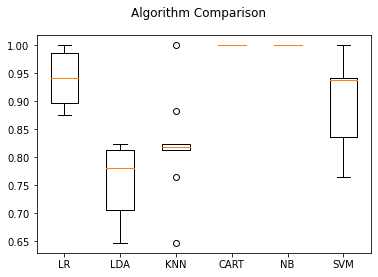

In [44]:
#Comparing algorithms
fig = plt.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()